# Matplotlib Components

There are several components of a Matplotlib figure. Understanding
how each of these fit together will give us better control over our
visualizations. This is important when we want to present our work
in papers, but it will also help us debug things when the default
settings for figures don't quite come out right. Let's take a look
at what is known as the object oriented interface of Matplotlib.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Alternative bit of magic to create interactive plots
# matplotlib notebook

## Figure

This is the container that holds the various features of our plots. 
It keeps track of all the figure's `Axes`, legends, titles, and the canvas object.

In [2]:
# an empty figure with no Axes
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [3]:
# What do the docs say about Figures?
# plt.figure?

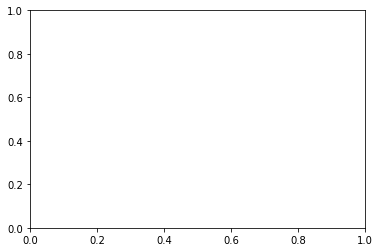

In [4]:
# a figure with a single Axes
fig, axs = plt.subplots()

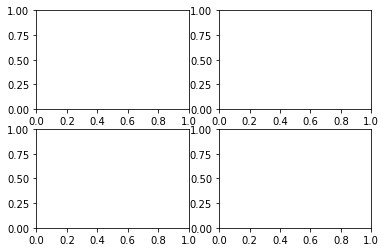

In [5]:
# 2x2 grid of subfigures
fig, axs = plt.subplots(2, 2) 

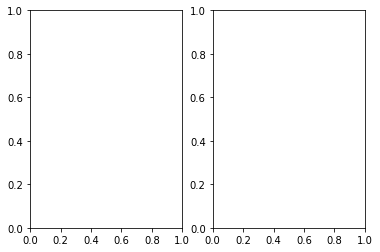

In [6]:
# 1 row, two columns
fig, axs = plt.subplots(1, 2) 

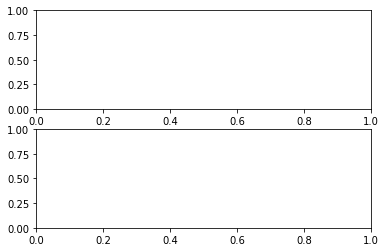

In [7]:
# 2 rows, 1 column
fig, axs = plt.subplots(2, 1) 

### Note:

Be careful of state when working in these notebooks! See how `matplotlib.pyplot` is creating figures and axes each time it is called? We are overriding state in each of these calls. This can be pretty dangerous when you are bouncing back and forth from previous notebook cells. 

## Axes

Axes are what we would consider the "plot" of our figure. They hold onto the data
that we are plotting. A `Figure` can have zero or many `Axes`, and each `Axes` (this is
a weird singular form) is associated with just one `Figure`.



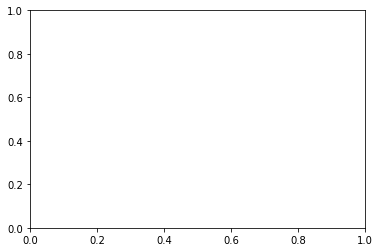

In [8]:
# Let's briefly ignore our figure
# Note: with %matplotlib inline, once we instantiate our figure,
# it will automatically plot it
_, ax = plt.subplots()

In [9]:
print(f'Our Axes: {ax}')

Our Axes: AxesSubplot(0.125,0.125;0.775x0.755)


When we call `plt.subplots`, you might be tempted to think of the visual we get being associated with our `fig` object. This is actually not the case! What we think of as the plot in our visualizations are actually instances of our `Axes`! Let's start by illustrating a figure we have already seen.

In [10]:
# Welcome back, data
squares = [x**2 for x in range(11)]
cubes = [x**3 for x in range(11)]
quads = [x**4 for x in range(11)]

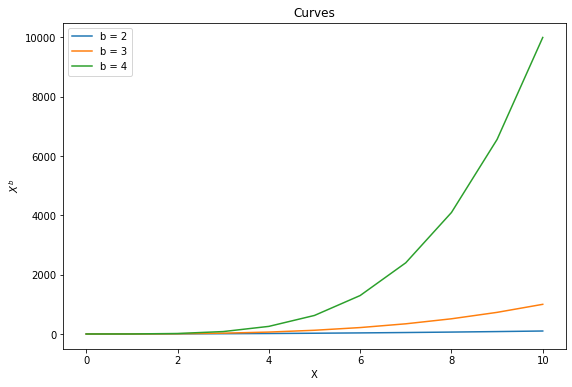

In [11]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(squares, label='b = 2')
ax.plot(cubes, label='b = 3')
ax.plot(quads, label='b = 4')
ax.set_ylabel(r'$X^{b}$')
ax.set_xlabel('X')
ax.set_title('Curves')
_ = ax.legend()

We are now explicitly using both the `Figure` and `Axes` objects. Let's see how you would handle multiple subplots with this approach

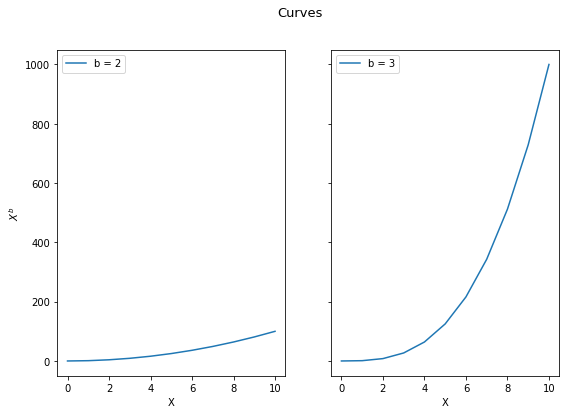

In [12]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, figsize=(9, 6), sharey=True
)

ax1.plot(squares, label='b = 2')
ax2.plot(cubes, label='b = 3')
ax1.set_ylabel(r'$X^{b}$')
ax1.set_xlabel('X')
ax1.legend(loc='upper left')
ax2.set_xlabel('X')
ax2.legend()
_ = fig.suptitle('Curves', fontsize=13)

### Great Todd, You Have Shown Us Two Ways to Do the Same Thing

You got that right. When you searching through Stack Overflow, keep in mind that there are two major interfaces when it comes to Matplotlib. Some answers out there might be for one of the two interfaces. You can save yourself some pain from contorting your approach to plots by remembering that. Generally, I would recommend sticking to one of the two approaches. And, unless you already have strong preferences, I would recommend using the object-oriented approach. It is more explicit, and makes it easier to have fine grained control over your plots without trying to remember the order of things in the state-machine approach.

You might say that whatever you can do with the object-oriented approach, you can do with with the state-machine approach. This may be true, but I think that you will find that the state-machine approach will prove unwieldy and difficult to maintain. You also may look at the above example and say, "Now I have to keep up with $ax1, ax2, ..., axn$!" Also true, but this means that we now have a repeating pattern which can be refactored.

### Refactoring with the Object-Oriented Approach

When we find that we are repeating ourselves in code, we likely able abstract some of that logic into some functions and other abstract data types. This helps us cut down on errors, and allows use to reuse our logic in various places.

In [13]:
def plotter(ax, data, x_label=None, y_label=None, params=None):
    """ Sweet plotting helper
    
    Args:
        ax: the Axes to draw
        data: x-axis data
        x_label: x-axis label
        y_label: y-axis label
        params: a dictionary of kwargs passed to ax.plot
        
    Returns:
        art_lists: lists of artists added to the figure
    """
    art_lists = ax.plot(data, **params)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    if params.get('label'):
        ax.legend(loc='upper left')
        
    return art_lists

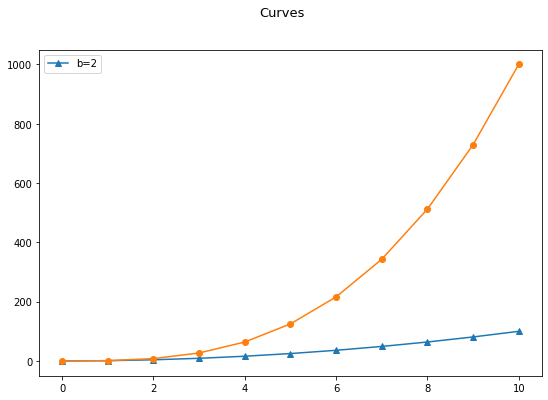

In [14]:
fig, ax = plt.subplots(figsize=(9, 6))

# The same, singular `Axes` passed to plotter
plotter(ax, squares, y_label=r'$X^{b}$', params={'marker': '^', 'label':'b=2'})
plotter(ax, cubes, params={'marker': 'o'})

_ = fig.suptitle('Curves', fontsize=13)

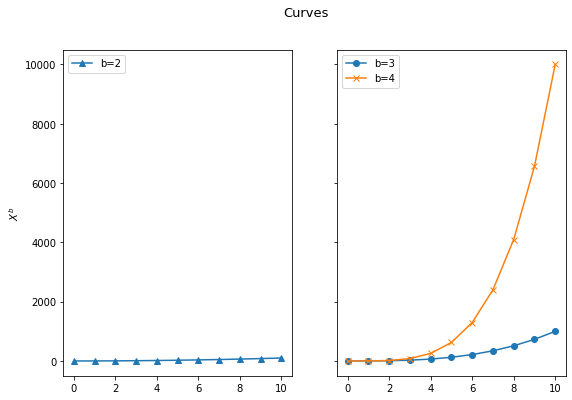

In [15]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, figsize=(9, 6), sharey=True
)

# Two sets of `Axes` passed to plotter gives us two separate subplots
plotter(ax1, squares, y_label=r'$X^{b}$', params={'marker': '^', 'label': 'b=2'})
plotter(ax2, cubes, params={'marker': 'o', 'label':'b=3'})
plotter(ax2, quads, params={'marker': 'x', 'label':'b=4'})

_ = fig.suptitle('Curves', fontsize=13)

In [16]:
# The underscore here is a convention in Python when we 
# want to ignore some returned object. This is just a 
# convention; we can still work with that object. 
# Note: if you were to use this convention and then 
# interact with that `_` later in your program, you will
# seriously confuse some Python programmers. This is just
# for illustration pruposes.
type(_)

matplotlib.text.Text

In [17]:
# What is matplotlib returning when we call `ax.plot`?
# mpl.text.Text?

### A Bit More on Refactoring

Refactoring code is always on ongoing process. There are many ways to approach each refactor, and picking your abstractions is an art. There are some things that I would do differently if the above refactor were to be used in one of my papers, but that gets us a bit more into a topic that we will cover later in the course: data structures.

With that being said, here is one thing you might want to think about. Generally, it is a good idea that have each of your functions perform one task. When you are thinking about some function $f(x, ...)$, ask yourself what is the one thing that function does. Ideally, it should be just one clearly defined thing. 